In [33]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('max_rows', 10000)
pd.set_option('max_columns', 10000)

In [28]:
i410_path = "/Users/sean/Desktop/Analyses for Jodie's new Data/2018_10_03_HD233_SAY47/i410.csv"
i410_movement_path = "/Users/sean/Desktop/Analyses for Jodie's new Data/2018_10_03_HD233_SAY47/movement.csv"

df = pd.read_csv(i410_path, header = None)
df['movement'] = pd.read_csv(i410_movement_path, header = None)
strain = {}
strain.update({x: 'HD233' for x in range(0, 41)})
strain.update({x: 'SAY47' for x in range(41, 80)})
strain.update({x: 'HD233' for x in range(80, 115)})
strain.update({x: 'SAY47' for x in range(115, 140)})
df['strain'] = pd.Series(df.index).map(strain)

In [55]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,movement,strain
0,2368.5,2818.5,3125.8,3688.9,4438.9,5218.4,5849.0,6116.9,6260.6,5827.1,5188.5,4772.5,4428.8,4531.4,4729.2,5068.1,5384.4,5306.0,5083.0,4607.4,3994.4,3335.6,2770.5,2391.7,2209.4,2179.6,2208.4,2206.7,2270.1,2391.7,2500.3,2537.4,2527.8,2559.7,2555.0,2507.8,2428.4,2314.7,2398.3,2526.2,2589.0,2576.7,2527.3,2574.9,2633.9,2620.3,2570.1,2512.8,2534.1,2665.3,2884.3,3090.4,3278.5,3433.3,3779.1,4172.8,4641.7,5039.6,5208.9,5219.4,5381.4,5555.3,5558.7,5388.0,5035.1,4625.8,4492.3,4421.4,4379.9,4301.5,4227.8,4167.6,4320.5,4482.4,4593.4,4634.3,4469.4,4062.1,3954.9,4137.5,4253.5,4225.3,4155.3,4070.1,3835.1,3478.2,3307.3,3228.4,3206.6,3158.5,3134.6,3053.8,2947.4,2810.7,2695.6,2564.6,2422.7,2333.8,2277.3,2166.8,0,HD233
1,2216.7,2799.0,3284.7,3780.5,4395.5,5032.1,5830.1,6360.6,6458.7,6256.4,5264.4,4281.8,3813.1,3434.8,3505.8,3809.0,4152.9,4331.7,3776.7,3057.4,2677.8,2347.7,2174.4,2052.2,1917.1,1812.8,1818.2,1996.0,2064.8,2087.9,2150.4,2359.8,2454.2,2582.2,2765.1,2879.4,2813.5,2631.3,2607.5,2727.3,2798.8,2729.7,2721.4,2803.5,2771.8,2689.0,2694.5,2844.0,2920.0,2923.4,3017.7,3252.8,3825.3,4385.8,4971.9,5622.9,6197.7,6666.3,6846.5,6895.5,6944.9,7026.8,6896.8,6407.8,5834.5,5301.3,4824.2,4766.7,4914.4,5182.2,5461.9,5610.7,5594.4,5631.2,5555.8,5379.4,5263.4,5293.5,5191.4,4990.0,4894.8,4858.3,4725.2,4448.4,4285.0,4231.5,4117.5,3786.4,3577.9,3535.2,3470.7,3341.2,3186.8,3080.4,2997.7,2873.2,2689.3,2568.9,2414.7,2108.3,0,HD233
2,2229.1,2957.7,3472.5,3987.1,4585.3,5253.0,6064.1,6886.4,7333.4,7297.0,6379.0,5425.6,4647.0,4097.4,3902.7,3804.6,3833.2,3766.6,3538.6,3237.2,2903.3,2658.9,2446.4,2215.9,2015.4,1889.1,1986.2,2027.5,2056.1,2062.7,2119.0,2194.1,2225.3,2149.3,2109.1,2086.0,2328.3,2488.8,2621.8,2753.3,2840.1,3033.9,2894.0,2773.3,2730.3,2730.9,2857.3,2958.6,3100.9,3262.6,3610.5,4092.5,4580.5,5037.9,5643.2,6318.1,6673.1,6956.2,7040.9,7127.3,7108.1,7049.6,6806.2,6508.7,6261.6,6058.0,5804.9,5544.1,5445.3,5432.1,5462.2,5507.9,5453.7,5352.7,5261.8,5211.6,5226.2,5284.6,5212.9,5021.1,4943.3,4924.2,4896.3,4875.1,4783.8,4671.7,4422.0,4221.6,4023.7,3878.1,3810.8,3790.5,3628.5,3418.9,3266.9,3148.8,3045.2,2967.2,2710.2,2371.4,0,HD233
3,2356.7,3060.6,3676.4,4469.3,5250.1,5843.3,6600.6,7294.2,7661.2,7763.6,7457.1,6531.9,5557.3,4896.0,4488.1,4159.9,4332.9,4763.7,4832.0,4575.2,4216.5,3809.4,3374.8,3101.5,2938.9,2806.1,2798.4,2746.4,2715.9,2847.7,2904.6,2962.4,3039.4,3043.7,3094.7,3164.4,3191.4,3250.6,3286.6,3254.4,3291.7,3417.5,3406.7,3296.8,3253.5,3285.3,3331.5,3402.5,3505.1,3706.2,3911.1,4097.3,4415.4,4769.4,5138.3,5640.6,6049.5,6526.5,6926.5,7141.0,7390.2,7520.0,7320.5,6989.5,6553.1,5888.6,5311.7,5200.8,5095.3,5014.5,4968.5,4874.0,4787.0,4720.2,4578.8,4553.3,4575.5,4418.7,4326.4,4293.7,4078.7,3955.8,3872.8,3566.7,3366.1,3329.7,3253.4,3134.7,3079.5,2991.1,2837.4,2766.1,2650.5,2541.1,2508.2,2376.7,2307.9,2284.8,2230.0,2095.9,0,HD233
4,2211.6,2799.0,3284.0,3681.1,4229.9,5022.6,5843.5,6828.8,7667.8,7732.6,7626.8,6642.7,5663.2,4894.2,4212.9,4205.8,4443.8,4615.2,4787.1,4743.9,4553.7,4229.9,3809.8,3469.7,3296.2,3352.7,3268.0,3259.2,3324.0,3615.1,3754.4,3629.8,3546.4,3507.3,3617.1,3423.7,3274.9,3220.1,3266.9,3409.2,3446.2,3446.8,3501.9,3621.6,3749.5,3681.8,3578.6,3606.0,3673.7,3770.0,3885.1,4049.5,4390.8,4817.4,5161.5,5417.5,5831.9,6326.8,6669.5,6795.6,6831.2,6799.6,6750.0,6597.9,6366.4,6065.6,5788.7,5535.9,5323.0,5253.9,5222.0,5216.8,5197.8,5074.6,4954.1,4894.7,4915.0,5000.6,5059.7,4991.6,4758.5,4597.2,4587.1,4458.3,4234.9,4047.0,3964.1,4077.4,3910.7,3636.7,3512.2,3528.6,3576.6,3531.2,3389.3,3242.8,3185.3,2988.6,2773.9,2195.8,0,HD233


In [84]:
strain_movement_grp = df.groupby(['strain', 'movement'], as_index = False)

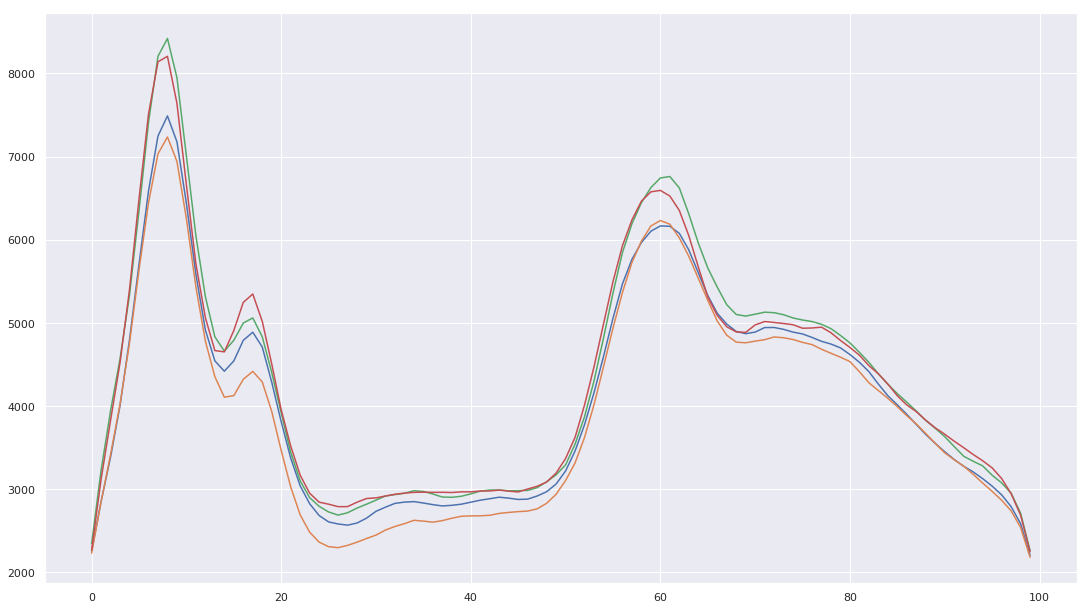

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for key, grp in strain_movement_grp:
    sns.lineplot(list(range(100)), grp[list(range(100))].mean(), ax = ax)